In [1]:
# !pip3 install shutup # Kills warning/error? messages.
# !pip3 install yfinance
# !pip3 install uncertainties
import shutup
shutup.please()

In [2]:
%pylab inline --no-import-all
%load_ext autoreload
from sys import path; path.append('../')
from cycles.cycles import *
import pickle

Populating the interactive namespace from numpy and matplotlib


Load data from Yahoo Finance

In [3]:
update_adj_close(["^IXIC","^DJI"],path="../cycles/data")

loading: ^IXIC
[*********************100%***********************]  1 of 1 completed
loading: ^DJI
[*********************100%***********************]  1 of 1 completed


In [4]:
start_date = "1992-01-02"
p = Portfolio(start_date, 50000)

Buy as many shares of ^IXIC as possible on `start_date`

In [5]:
symbol = "^IXIC"
p.buy(symbol, start_date)

Initialize a test object, which will test from the last activity date of the portfolio (currently `start_date`) through 2021-02-26

In [6]:
end_date = "2021-02-26"
test = Strategies(p, end_date)

Run a cycles test using "absolute" cycles requirement

In [7]:
train_days = 60 # number of days to train on
predict_days = 6 # prediction window
max_rank = 30 # number of cycles to fit to training data
method = "absolute" # absolute cycles requirement
sell_thresh = 4 # required number of cycles with maxes in prediction window to buy
buy_thresh = 4 # required number of cycles with mins in prediction window to sell
min_len_factor = 2 # eligible cycles have period > min_len_factor * predict_days

print("processing:",symbol)
p_new = test.cycles(\
    train_days=train_days,
    predict_days=predict_days,
    max_rank=max_rank,
    method=method,
    min_len_factor=min_len_factor,
    sell_thresh=sell_thresh,
    buy_thresh=buy_thresh
    )
print("close value:",p_new.value())

processing: ^IXIC
(1992-02-05 00:00:00) num_pass: 7, sell: 4, threshold: 4 - selling
(1992-02-13 00:00:00) num_pass: 5, buy: 4, threshold: 4 - buying
(1992-05-19 00:00:00) num_pass: 5, sell: 4, threshold: 4 - selling
(1992-07-01 00:00:00) num_pass: 5, buy: 5, threshold: 4 - buying
(1992-07-28 00:00:00) num_pass: 5, sell: 5, threshold: 4 - selling
(1992-09-17 00:00:00) num_pass: 6, buy: 4, threshold: 4 - buying
(1992-12-03 00:00:00) num_pass: 6, sell: 4, threshold: 4 - selling
(1993-03-10 00:00:00) num_pass: 7, buy: 4, threshold: 4 - buying
(1993-04-22 00:00:00) num_pass: 5, sell: 4, threshold: 4 - selling
(1993-05-10 00:00:00) num_pass: 6, buy: 5, threshold: 4 - buying
(1993-06-04 00:00:00) num_pass: 6, sell: 4, threshold: 4 - selling
(1993-07-09 00:00:00) num_pass: 6, buy: 4, threshold: 4 - buying
(1994-01-24 00:00:00) num_pass: 5, sell: 4, threshold: 4 - selling
(1994-04-04 00:00:00) num_pass: 7, buy: 5, threshold: 4 - buying
(1994-05-09 00:00:00) num_pass: 6, sell: 4, threshold: 4 -

(2007-11-08 00:00:00) num_pass: 5, sell: 4, threshold: 4 - selling
(2007-11-16 00:00:00) num_pass: 6, buy: 5, threshold: 4 - buying
(2007-12-13 00:00:00) num_pass: 5, sell: 4, threshold: 4 - selling
(2008-01-10 00:00:00) num_pass: 6, buy: 4, threshold: 4 - buying
(2008-01-18 00:00:00) num_pass: 6, sell: 4, threshold: 4 - selling
(2008-03-04 00:00:00) num_pass: 6, buy: 4, threshold: 4 - buying
(2008-03-20 00:00:00) num_pass: 4, sell: 4, threshold: 4 - selling
(2008-07-11 00:00:00) num_pass: 5, buy: 4, threshold: 4 - buying
(2009-01-28 00:00:00) num_pass: 5, sell: 4, threshold: 4 - selling
(2009-02-05 00:00:00) num_pass: 5, buy: 4, threshold: 4 - buying
(2009-05-20 00:00:00) num_pass: 5, sell: 5, threshold: 4 - selling
(2009-07-02 00:00:00) num_pass: 4, buy: 4, threshold: 4 - buying
(2009-08-24 00:00:00) num_pass: 6, sell: 4, threshold: 4 - selling
(2009-09-01 00:00:00) num_pass: 6, buy: 4, threshold: 4 - buying
(2009-09-18 00:00:00) num_pass: 5, sell: 4, threshold: 4 - selling
(2009-12-

In [8]:
p_new.positions

,cash,^IXIC
1992-01-02,151.748962,85.0
1992-02-13,54475.246887,0.0
1992-02-24,106.337524,87.0
1992-05-28,50608.966675,0.0
1992-07-10,74.767761,89.0
...,...,...
2020-05-15,380940.755249,0.0
2020-07-08,3210.755249,36.0
2020-09-23,385998.403687,0.0
2021-01-25,4190.677124,28.0


Plot showing price history with buy and sell events

Text(0.5, 1.0, 'cycles: ^IXIC')

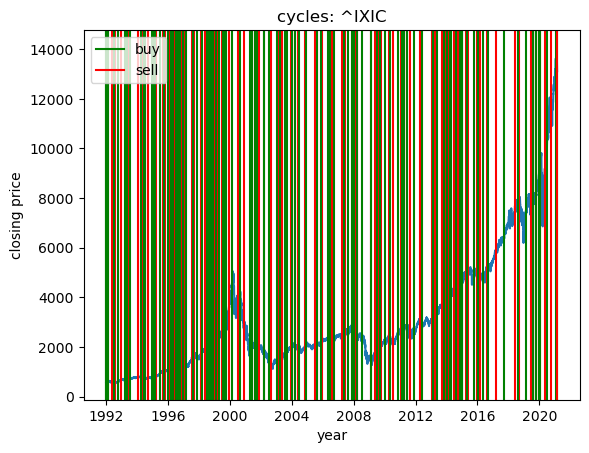

In [9]:
data = read_adj_close([symbol])
data_dates = data.index

s_idx = np.where(data_dates == start_date)[0][0]
e_idx = np.where(data_dates == end_date)[0][0]

plt.plot(data[symbol].index[s_idx:e_idx],data[symbol].values[s_idx:e_idx])
for d in p_new.positions.index[np.where(p_new.positions[symbol].values == 0)]:
    plt.axvline(d, c='r')

for d in p_new.positions.index[np.where(p_new.positions[symbol].values != 0)]:
    plt.axvline(d, c='g')

plt.axvline(pd.to_datetime(start_date), c='g', label='buy')
plt.axvline(pd.to_datetime(end_date), c='r', label='sell')
plt.xlabel('year')
plt.ylabel('closing price')
plt.legend(loc=2)
plt.title(f"cycles: {symbol}")